# Lab 5 Notebook
written by Corey Beard ccbeard@uci.edu

This notebook will attempt to simulate Physics 52C Lab 5 related to Inverse Photoelectric Effect. 

Certain cells will be editable, and are meant to mimic students adjusting settings on laboratory equipment. Certain cells are uneditable, and are meant to simulate nature, producing values as read by your instrument, depending on your settings.


In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as optimization

### This next cell is the main function that returns currents depending on the color of your diode, and the voltage values you are measuring. 

**It should not be edited.**

In [5]:
def Current(V,Color):    
    # This function will take in a voltage and diode color, and spit out the corresponding current
        
    V_Red=1.8
    V_Blue=2.3
    V_Yellow=1.9
    V_Green=2.0
    V_Violet=2.6
    V_UV=2.7
    
    #elec = 1.602*10**(-19)
    #k = 1.38*10**(-23)
    #T = 300
    
    if Color == 'Red':
        if V < V_Red:
            out = 0.0 
        else:
            out = np.exp(V-V_Red)-1
    elif Color == 'Blue':
        if V < V_Blue:
            out = 0.0 
        else:
            out = np.exp(V-V_Blue)-1 
    elif Color == 'Yellow':
        if V < V_Yellow:
            out = 0.0 
        else:
            out = np.exp(V-V_Yellow)-1 
    elif Color == 'Green':
        if V < V_Green:
            out = 0.0 
        else:
            out = np.exp(V-V_Green)-1 
    elif Color == 'Violet':
        if V < V_Violet:
            out = 0.0 
        else:
            out = np.exp(V-V_Violet)-1 
    elif Color == 'UV':
        if V < V_UV:
            out = 0.0 
        else:
            out = np.exp(V-V_UV)-1 
    else:
        print('Make sure Color is set as Red, Blue, Yellow, Green, Violet or UV')
        
    if out > 0.0001: return out/5*(1+np.random.normal(0,0.05))    
    else: return np.abs(0.0001*(1+np.random.normal(0,0.05)))

**These are default parameters. And should not be edited also.**

In [6]:
Resistor_R = 100.0 #Resistance of the resistor, in Ohms

## 5.3.2 Diode I-V Characteristics

Here your goal is to see how current flows through a circuit as you change voltage, when using diodes of different colors. 

**Lab guide says use the 635nm LED, so we'll use the "red" colored LED.**

The cell below returns the current for an input voltage value. Lab guide says describe the behavior of current
as the voltage is decreased from a high value. Input different voltage values and see what the output current is.

In [7]:
LED_color = 'Red'  #LED color - for this section its fixed to Red
Volts=1.79 #input the voltage - edit this cell and rerun as needed 
I=Current(Volts,LED_color)
print('Input volts (Volt): {}.format(Volts)')
print('Output Current {} (mA)'.format(I))

Input volts (Volt): {}.format(Volts)
Output Current 0.00010014567512904014 (mA)


**1. Turn down the voltage until the current is close to zero as possible. This iw when the LED is barely glowing. What is the  minimum current you can determine?**

**This may be easier to answer with the next step by making a graph of 15-20 values of V vs I.** 

To help with this we give a python code to generate all the measurements in one go. First the variables.

In [8]:
Min_Voltage = 0.0 #The minimium voltage
Max_Voltage = 3.0 # The maximum voltage 
Measurements = 20 #Number of voltage measurements you plant to take for each LED
LED_color = 'Red'  #LED color - for this section its fixed to Red

Below is the routine that generates V vs I data.

In [9]:
Volts = np.arange(Min_Voltage,Max_Voltage,(Max_Voltage-Min_Voltage)/Measurements)
I = []
for v in Volts:
    I.append(Current(v,LED_color))

df = pd.DataFrame({"Voltage (Volt)": Volts, "Current (mA)": I})
print(df)

    Voltage (Volt)  Current (mA)
0             0.00      0.000104
1             0.15      0.000093
2             0.30      0.000101
3             0.45      0.000104
4             0.60      0.000103
5             0.75      0.000095
6             0.90      0.000103
7             1.05      0.000099
8             1.20      0.000097
9             1.35      0.000101
10            1.50      0.000096
11            1.65      0.000096
12            1.80      0.000106
13            1.95      0.032357
14            2.10      0.071624
15            2.25      0.104626
16            2.40      0.175277
17            2.55      0.205946
18            2.70      0.266815
19            2.85      0.361885


**2. Make a plot of the above V vs I data.**

Section says plot for both linear and on a semi-log graph. Try to get more measurements close to the I low region as possible. You can make these plots within python or outside of python like excel. Please enter code/plots below or insert (or upload) images/photos of the grpah. If you need semi-log paper, you can print them from here: http://www.physics.utah.edu/~gernot/elem_labs/Graph_paper.htm

We encourage codes written within Python whenever possible. To help we give the example for the plot below.

***Here we give an example python code to plot red LED V vs I data***

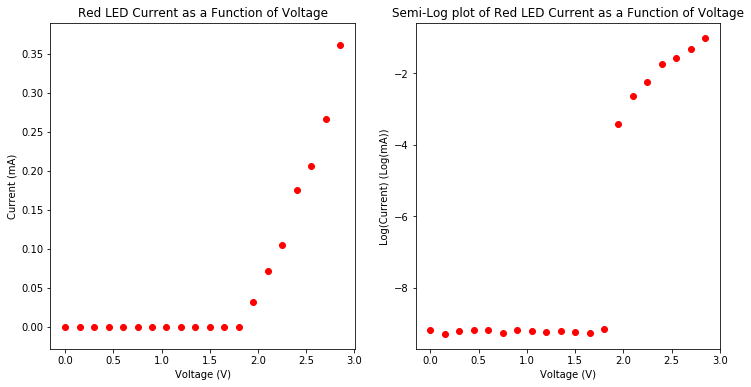

In [10]:
plt.figure(figsize=(12,6))

plot_color = LED_color
if LED_color == 'UV':
    plot_color = 'black'

plt.subplot(121)

plt.scatter(Volts,I,color=plot_color)
plt.title(LED_color+' LED Current as a Function of Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (mA)')


plt.subplot(122)

plt.scatter(Volts,np.log(I),color=plot_color)
plt.title('Semi-Log plot of ' + LED_color+' LED Current as a Function of Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Log(Current) (Log(mA))')

plt.show()

Note that on the above semi-log graph, the large gap of I values when it decrease since we only sample V values uniformly when generating the data. You can resample or add more data points than 20 to try to fill this gap. 

Even with more data you'll notice a break; this is how the LED behaves and consistent with lab measurements. See below with a large number (1000) of measurements.

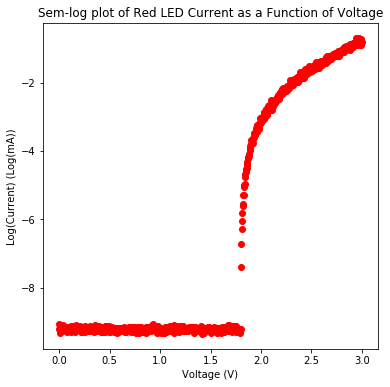

In [11]:
#best not to edit any below
plt.figure(figsize=(6,6))
Measurements = 1000 #Number of voltage measurements you plant to take for each LED
Volts = np.arange(Min_Voltage,Max_Voltage,(Max_Voltage-Min_Voltage)/Measurements)
I = []
for v in Volts:
    I.append(Current(v,LED_color))

plt.scatter(Volts,np.log(I),color=plot_color)
plt.title('Sem-log plot of ' + LED_color+' LED Current as a Function of Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Log(Current) (Log(mA))')

plt.show()

The Voltage value where I drop rapidly is the **turn-on voltage** that LED starts to light up.

# 5.3.3 Dependence of Voltage on Wavelength

This section involves measuring the turn-on voltages and their uncertainties for all six LEDs.

The six LEDS, wavelength are as follows:

|  Color |lambda  |
|-------|--------|
|UV     | 375 nm |
|-------|--------|
|Violet | 400 nm |
|-------|--------|
|Blue   | 470 nm |
|-------|--------|
|Green  | 535 nm |
|-------|--------|
|Yellow | 580 nm |
|-------|--------|
|Red    | 635 nm | 



This can be done by changing the color of the LED in above code and plotting each LED curve. 

We reproduce the code and curve below. To be consistent with lab, try to estimate turn-on voltages with just 20 measurements so the uncertainty is a better reflection of the expected lab measurements.

**Change LED color below and rerun and estimate turn-on voltages and an uncertainty to turn-on voltage.**

Record data on a paper. After several boxes below you will find a pyhton box to enter voltages and uncertainties to arrays for further calculations. If easier, the second box below provides a way to get data of all six LEDs in a single table.

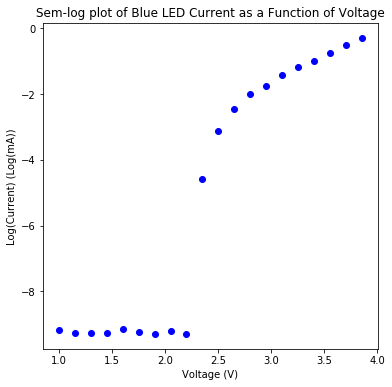

In [12]:
Measurements = 20 #Number of voltage measurements you plant to take for each LED - keep to 20 for lab

Min_Voltage = 1.0 #The minimium voltage, may need to change
Max_Voltage = 4.0 # The maximum voltage, may need to change

LED_color = 'Blue'  #Edit this entry for six LEDs. Options are: UV, Violet, Blue, Green, Yellow, Red


#best not to edit below

plt.figure(figsize=(6,6))

plot_color = LED_color
if LED_color == 'UV':
    plot_color = 'black'

Volts = np.arange(Min_Voltage,Max_Voltage,(Max_Voltage-Min_Voltage)/Measurements)
I = []
for v in Volts:
    I.append(Current(v,LED_color))

plt.scatter(Volts,np.log(I),color=plot_color)
plt.title('Sem-log plot of ' + LED_color+' LED Current as a Function of Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Log(Current) (Log(mA))')

plt.show()

Below is a pyhton code to generate all data in one go. And a single plot of all six LED data graphed together. 

    V Volt  UV I(mA)  Violet I    Blue I   Green I  Yellow I  Red I(mA)
0     1.00  0.000107  0.000111  0.000091  0.000105  0.000101   0.000096
1     1.15  0.000101  0.000096  0.000101  0.000102  0.000092   0.000092
2     1.30  0.000103  0.000103  0.000093  0.000104  0.000102   0.000103
3     1.45  0.000094  0.000103  0.000104  0.000101  0.000109   0.000100
4     1.60  0.000099  0.000100  0.000104  0.000106  0.000097   0.000096
5     1.75  0.000092  0.000105  0.000109  0.000103  0.000095   0.000095
6     1.90  0.000104  0.000096  0.000096  0.000108  0.000100   0.021105
7     2.05  0.000104  0.000093  0.000098  0.010814  0.032353   0.061596
8     2.20  0.000100  0.000099  0.000103  0.042931  0.069238   0.095729
9     2.35  0.000101  0.000098  0.010300  0.085798  0.123052   0.136257
10    2.50  0.000100  0.000112  0.043173  0.133656  0.155817   0.204327
11    2.65  0.000104  0.010406  0.079937  0.188715  0.227063   0.261360
12    2.80  0.021263  0.046698  0.128170  0.231577  0.307666   0

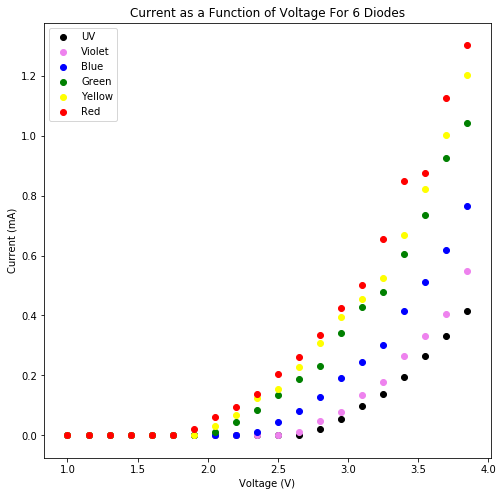

In [13]:
Measurements = 20 #Number of voltage measurements you plant to take for each LED - keep to 20 for lab

Min_Voltage = 1.0 #The minimium voltage, may need to change
Max_Voltage = 4.0 # The maximum voltage, may need to change

#best not to edit below

colors = ['UV','Violet','Blue','Green','Yellow','Red']
plot_colors =  ['black','violet','blue','green','yellow','red']
data = {}
#get the data for all the colors
for i in range(len(colors)):
    temp = []
    for j in range(len(Volts)):
        temp.append(Current(Volts[j],colors[i]))
    data[colors[i]]=temp
  
df = pd.DataFrame({"V Volt": Volts, "UV I(mA)": data[colors[0]],\
                   "Violet I": data[colors[1]],\
                   "Blue I": data[colors[2]],\
                   "Green I": data[colors[3]],\
                   "Yellow I": data[colors[4]],\
                   "Red I(mA)": data[colors[5]]})
print(df)

#nowa single plot them all together
plt.figure(figsize=(8,8))
for i in range(len(colors)):
    plt.scatter(Volts,data[colors[i]],color=plot_colors[i])
plt.title('Current as a Function of Voltage For 6 Diodes')
plt.ylabel('Current (mA)')
plt.xlabel('Voltage (V)')
plt.legend(colors)
plt.show()

### Using data generated above make a Table of LED wavelength, LED frequency, V$_x$ (turn on volatge/Volts), $\sigma$(V$_x$) (uncertainty in turn-on voltage/Volts)

***text says also record current at the minimum, since this is not needed for 5.3.4 below, lets ignore recording current data***

First we generate wavelength (copied from entries in first text cell under 5.3.3) and frequency arrays. There is nothing to edit below except to Run the code.

In [14]:
#all wavelengths are in nm

#this cell is fixed values so best not edit

c=3e8 #light speed m/s

lambda_UV = 375
lambda_Violet = 400
lambda_Blue = 470
lambda_Green = 535
lambda_Yellow = 580
lambda_Red = 635

lambda_array = np.array([lambda_UV,lambda_Violet,lambda_Blue,lambda_Green,lambda_Yellow,lambda_Red])
freq_array = c/(lambda_array*1e-9)/1e12 # freq in THz

**1. Use the figure or data above to estimate the turn on voltage for each LED color, and record it in the cell below.** 

In above you may have already done the work and recorded the turn-on voltages and uncertainities on a paper. Below enter those values, separated by LED color.

The entries are left blank now. **If you run this code without entries you will get an error. If you want to run the code, at least enter dummy values and replace them later with measurements from data.**

In [15]:
# This is where  you enter data. 
# Vx_color is the value of turn-on voltage
# Vxerr_color is the value of uncertainty or error on turn-on voltage


#UV LED

Vx_UV =              # turn-on voltage enter here - to an accuracy consistent with error
Vxerr_UV=            # error enter here. 

# for other LEDs follow as above.

#Violet LED

Vx_Violet = 
Vxerr_Violet= 

#Blue LED

Vx_Blue = 
Vxerr_Blue=

#Green LED
Vx_Green = 
Vxerr_Green=

#Yellow LED
Vx_Yellow = 
Vxerr_Yellow=

#Red LED
Vx_Red = 
Vxerr_Red=

#this is for later use so best not to edit below

volt_array = np.array([Vx_UV,Vx_Violet,Vx_Blue,Vx_Green,Vx_Yellow,Vx_Red])
err_array = np.array([Vxerr_UV,Vxerr_Violet,Vxerr_Blue,Vxerr_Green,Vxerr_Yellow,Vxerr_Red])

SyntaxError: invalid syntax (<ipython-input-15-770a9af0731a>, line 8)

This next cell creates a table of your values, and **should not be edited.**

In [16]:
df = pd.DataFrame({"Wavelength (microns)": lambda_array, "Freq (THz)": freq_array, "Turn-on Volt (V)": volt_array, "Volt Error (V)": err_array})
print(df)

NameError: name 'volt_array' is not defined

**2. Explain below how you estimate the uncertainty or error on turn-on voltage. It is completely fine to make a rough estimate of the error based on your V vs I graphs by eye. You are also free to use some statistical analysis method, but not required.** 

# 5.3.4 Least Squares Fitting

**1. Plot the turn on voltages $V_x$ as a function of the frequency, include error bars capturing the uncertainty for $V_x$. You can plot the data outside of python. If you do please insert an image or upload your graph.**

For reference below is a python code to plot the data entered above.

NameError: name 'volt_array' is not defined

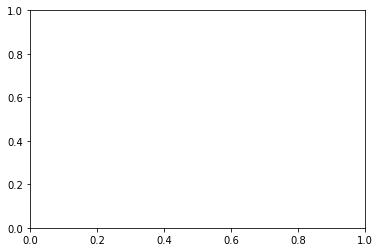

In [17]:
fig, ax = plt.subplots()

for i in range(len(colors)):
    x=freq_array
    y=volt_array
    yerr=err_array

ax.errorbar(x,y,xerr=0,yerr=yerr,fmt='ro')
ax.set_xlabel('Freq (THz)')
ax.set_ylabel('Turn-on Voltage Vx (Volt)')
ax.set_title('Turn on Voltage as a Function of Frequency')
plt.show()

**Now follow Taylor Chapter 8 to determine the best-fit values for a line of the form $y=A+B*x$ to describe the data, where $y$ would be turn-on voltage and $x$ freq (in THz).**

Here the linear fit is such that $B$ denotes gradient and $A$ is the intercept. 

Note that Taylor Chapter 8 has equations to determine A and B in the case errors of y values are ignored. If you used those equations please state below. It is recommended, but not required, to do a model fit with y errors.
Model fitting data with errors involve weighting each data point by the variance and correcting the normalization for the weights used. Equations accounting for non-uniform y errors are given on Page 198 of Taylor and also derived and shown in boxes in Problem 8.9.

**2. What are the best fit values of A and B and their errors, $\delta A$ and $\delta B$?**


**3. Also add the best-fit line to your graph of data, you can update the graph in 1 or insert below.**

**4. State which method (including y errors or y errors ignored) was used to determine A and B, and their errors $\delta A$ and $\delta B$.**

**5. Update the graph in 2 above to also include two additional lines (plotted as dotted lines) that represent the cases of $B \pm \delta B$.**

Insert an image of your graph below or upload a separate image to Canvas. You are also free to show these two lines in graph related to item 2 in above.


**6. Use the value of B and error $\delta B$ to calculate $h/e$ and its error and compare with the accepted value.** 

### Comparison results

***For comparison, we use a built-in routine in scipy to do a least-squares model fit to the data. Below should not be edited. You should check on e/h value and its error below for comparison.***

In [18]:
def func(x,a,b):
    return a + b*x

pfit, pcov = optimization.curve_fit(func, freq_array, volt_array)
a = pfit[0]
b = pfit[1]
perr= np.sqrt(np.diag(pcov))
aerr = perr[0]
berr = perr[1]

x = np.linspace(freq_array[0],freq_array[5],1000)
y = a + b*x
yup = (a) + (b + berr)*x
ydown = (a) + (b - berr)*x
plt.figure(figsize=(6,6))
for i in range(len(colors)):
    plt.errorbar(freq_array[i],volt_array[i],yerr=err_array[i],fmt='o',color=plot_colors[i])
    
plt.plot(x,y,color='black')
plt.plot(x,yup,color='gray',linestyle='dotted')
plt.plot(x,ydown,color='gray',linestyle='dotted')
plt.title('Turn on Voltage as a Function of Frequency')
plt.ylabel('Turn on Voltage (V)')
plt.xlabel('Frequency (THz)')
info = ['Linear Fit','Estimated Errors','Estimated Errors','Measured Values']
plt.legend(info)

plt.show()

accepted = 4.13e-15
measured = b/(10**12)
error = berr/(10**12)

print("Accepeted h/e in J/s/C units:",accepted)
print("Measured h/e from data entered in 5.3.3:",measured)
print("Uncertainty on measured h/e:",error)

NameError: name 'volt_array' is not defined

# 5.4 Reflection Questions

1. Explain why and LED's brightness is proportional to the current flowing through it.

2. Why must and LED that produces green photons have a bigger voltage drop than one producing red photons? (Explain in words)

3. Explain the difference between photoelectric effect and the inverse photoelectric effect.

4. Explain the sign of the y-intercept in the least squares fit in terms of energy balance. (Hint: in the photoelectric effect, the y intercept is the work function of the metal)

5. Consider the dotted lines you produced in the graph in section 5.3.4. Does the uncertainty in the fit to the data seem reasonable?

# 5.5 Extra credit analysis

This analysis is optional but worth 10 extra points.

You can use python (will need to write a small amount of code) or this can be done with excel or any other computer software or program that allows plotting (or even a graphing calculator).
You are welcome to use any plotting software i.e. excel, mathematica, python, to do so.  Insert an image of your graph below or upload a separate image to Canvas.

If you are using Python feel free to use the example code above we have given for a comparison model fit.

Replot the turn-on voltage $V_x$ versus the frequency $\nu$ using software. Now instead of Tyalor equations use a least-squares model fit or a linear regression to fit a linear curve of the form $y=A+b*x$ to the data, including error bars to y values. 

**What values do you get for the fitting coefficients A and B?** 


**Are these equal to the values you computed above using Taylor Chapter 8 equations? Why or why not?**